<a href="https://colab.research.google.com/github/Bhuvana23013531/basic-nn-model/blob/main/EX01DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.preprocessing import MinMaxScaler

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [8]:
from google.colab import auth
import gspread
from google.auth import default

In [9]:
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

In [10]:
worksheet = gc.open('deeplearn').sheet1
data = worksheet.get_all_values()

In [11]:
dataset1 = pd.DataFrame(data[1:], columns=data[0])
dataset1 = dataset1.astype({'input':'float'})
dataset1 = dataset1.astype({'output':'float'})

In [12]:
dataset1.head(10)

,input,output
0,1.0,4.0
1,2.0,7.0
2,3.0,10.0
3,4.0,13.0
4,5.0,16.0
5,6.0,19.0
6,7.0,22.0
7,8.0,25.0
8,9.0,28.0
9,10.0,31.0


In [13]:
X = dataset1[['input']].values
y = dataset1[['output']].values

In [14]:
X

array([[ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.]])

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33,random_state = 33)

In [16]:
Scaler = MinMaxScaler()

In [17]:
Scaler.fit(X_train)

MinMaxScaler()

In [18]:
X_train1 = Scaler.transform(X_train)

In [19]:
ai = Sequential([
    Dense(units= 4, activation = 'relu' ,input_shape = [1]),
    Dense(units = 1)
])

In [20]:
ai.compile(optimizer="rmsprop",loss='mse')

In [21]:
ai.fit(X_train1, y_train,epochs=4000)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 9ms/step - loss: 118.4773
Epoch 1502/4000
1/1 [==============================] - 0s 10ms/step - loss: 118.3612
Epoch 1503/4000
1/1 [==============================] - 0s 10ms/step - loss: 118.2450
Epoch 1504/4000
1/1 [==============================] - 0s 10ms/step - loss: 118.1289
Epoch 1505/4000
1/1 [==============================] - 0s 14ms/step - loss: 118.0128
Epoch 1506/4000
1/1 [==============================] - 0s 9ms/step - loss: 117.8966
Epoch 1507/4000
1/1 [==============================] - 0s 9ms/step - loss: 117.7805
Epoch 1508/4000
1/1 [==============================] - 0s 10ms/step - loss: 117.6644
Epoch 1509/4000
1/1 [==============================] - 0s 7ms/step - loss: 117.5484
Epoch 1510/4000
1/1 [==============================] - 0s 6ms/step - loss: 117.4323
Epoch 1511/4000
1/1 [==============================] - 0s 6ms/step - loss: 117.3162
Epoch 1512/4000
1/1 [===============

In [22]:
loss_df = pd.DataFrame(ai.history.history)

<Axes: >

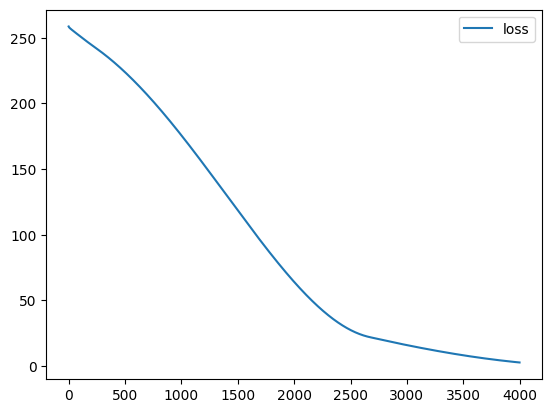

In [23]:
loss_df.plot()

In [24]:
X_test1 = Scaler.transform(X_test)

In [25]:
ai.evaluate(X_test1,y_test)

1/1 [==============================] - 0s 96ms/step - loss: 2.9155


2.9155361652374268

In [26]:
X_n1 = [[10]]

In [27]:
X_n1_1 = Scaler.transform(X_n1)

In [28]:
ai.predict(X_n1_1)

1/1 [==============================] - 0s 91ms/step


array([[28.399828]], dtype=float32)